In [2]:
import numpy as np

def update_mu(X, Sigma):
    """ Update mu given fixed Sigma. """
    n = X.shape[0]
    Sigma_inv = np.linalg.inv(Sigma)
    mu_new = np.dot(np.sum(X, axis=0), Sigma_inv) / np.sum(Sigma_inv)
    return mu_new

def update_sigma(X, mu):
    """ Update Sigma given fixed mu. """
    n = X.shape[0]
    diff = X - mu
    Sigma_new = np.sum(np.array([np.outer(d, d) for d in diff]), axis=0) / n
    return Sigma_new

def cyclic_bcgd(X, init_mu, init_sigma, max_iter=100):
    """ Run Cyclic Block Coordinate Gradient Descent """
    mu = init_mu
    Sigma = init_sigma
    print("Initial mu:", mu)
    print("Initial Sigma:\n", Sigma)

    for i in range(max_iter):
        mu = update_mu(X, Sigma)
        Sigma = update_sigma(X, mu)
        
        if i % 10 == 0:  # Print every 10 iterations
            print(f"Iteration {i+1}: mu = {mu}, Sigma = \n{Sigma}")
    
    return mu, Sigma

def randomized_bcgd(X, init_mu, init_sigma, max_iter=100):
    """ Run Randomized Block Coordinate Gradient Descent """
    mu = init_mu
    Sigma = init_sigma
    print("Initial mu:", mu)
    print("Initial Sigma:\n", Sigma)

    for i in range(max_iter):
        if np.random.rand() < 0.5:
            mu = update_mu(X, Sigma)
        else:
            Sigma = update_sigma(X, mu)
        
        if i % 10 == 0:  # Print every 10 iterations
            print(f"Iteration {i+1}: mu = {mu}, Sigma = \n{Sigma}")
    
    return mu, Sigma

# Example usage
np.random.seed(0)
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
init_mu = np.mean(X, axis=0)
init_sigma = np.cov(X, rowvar=False)

print("Cyclic BCGD Results:")
mu_est_cyclic, sigma_est_cyclic = cyclic_bcgd(X, init_mu, init_sigma)

print("\nRandomized BCGD Results:")
mu_est_random, sigma_est_random = randomized_bcgd(X, init_mu, init_sigma)


Cyclic BCGD Results:
Initial mu: [-0.07055996  0.07221871]
Initial Sigma:
 [[1.02998695 0.53063457]
 [0.53063457 1.07358616]]
Iteration 1: mu = [-10.94440209  10.7287207 ], Sigma = 
[[ 119.26012974 -115.35179211]
 [-115.35179211  114.62388504]]
Iteration 11: mu = [-10.86621972  10.73342576], Sigma = 
[[ 117.56595689 -114.56943576]
 [-114.56943576  114.724186  ]]
Iteration 21: mu = [-10.86618859  10.73336922], Sigma = 
[[ 117.56528456 -114.56849345]
 [-114.56849345  114.72298052]]
Iteration 31: mu = [-10.86618859  10.73336924], Sigma = 
[[ 117.56528475 -114.56849372]
 [-114.56849372  114.72298087]]
Iteration 41: mu = [-10.86618859  10.73336924], Sigma = 
[[ 117.56528475 -114.56849372]
 [-114.56849372  114.72298087]]
Iteration 51: mu = [-10.86618859  10.73336924], Sigma = 
[[ 117.56528475 -114.56849372]
 [-114.56849372  114.72298087]]
Iteration 61: mu = [-10.86618859  10.73336924], Sigma = 
[[ 117.56528475 -114.56849372]
 [-114.56849372  114.72298087]]
Iteration 71: mu = [-10.86618859  1

In [3]:
import numpy as np

def update_mu(X, Sigma):
    """ Update mu given fixed Sigma. """
    n = X.shape[0]
    Sigma_inv = np.linalg.inv(Sigma)
    mu_new = np.dot(np.sum(X, axis=0), Sigma_inv) / np.sum(Sigma_inv)
    return mu_new

def update_sigma(X, mu):
    """ Update Sigma given fixed mu. """
    n = X.shape[0]
    diff = X - mu
    Sigma_new = np.sum(np.array([np.outer(d, d) for d in diff]), axis=0) / n
    return Sigma_new

def has_converged(mu_old, mu_new, sigma_old, sigma_new, tol=1e-3):
    """ Check if the change in parameters is below the threshold 'tol'. """
    delta_mu = np.linalg.norm(mu_new - mu_old)
    delta_sigma = np.linalg.norm(sigma_new - sigma_old, ord='fro')  # Frobenius norm for matrices
    return delta_mu < tol and delta_sigma < tol

def cyclic_bcgd(X, init_mu, init_sigma, max_iter=100, tol=1e-3):
    """ Run Cyclic Block Coordinate Gradient Descent with convergence check """
    mu = init_mu
    Sigma = init_sigma
    mu_old, sigma_old = None, None

    for i in range(max_iter):
        if mu_old is not None and sigma_old is not None:
            if has_converged(mu_old, mu, sigma_old, Sigma, tol):
                print(f"Converged at iteration {i}")
                break

        mu_old, sigma_old = mu.copy(), Sigma.copy()
        mu = update_mu(X, Sigma)
        Sigma = update_sigma(X, mu)
        
        if i % 10 == 0:
            print(f"Iteration {i+1}: mu = {mu}, Sigma = \n{Sigma}")

    return mu, Sigma, i  # return the number of iterations taken to converge

def randomized_bcgd(X, init_mu, init_sigma, max_iter=100, tol=1e-3):
    """ Run Randomized Block Coordinate Gradient Descent with convergence check """
    mu = init_mu
    Sigma = init_sigma
    mu_old, sigma_old = None, None

    for i in range(max_iter):
        if mu_old is not None and sigma_old is not None:
            if has_converged(mu_old, mu, sigma_old, Sigma, tol):
                print(f"Converged at iteration {i}")
                break

        mu_old, sigma_old = mu.copy(), Sigma.copy()

        if np.random.rand() < 0.5:
            mu = update_mu(X, Sigma)
        else:
            Sigma = update_sigma(X, mu)

        if i % 10 == 0:
            print(f"Iteration {i+1}: mu = {mu}, Sigma = \n{Sigma}")

    return mu, Sigma, i  # return the number of iterations taken to converge

# Example usage
np.random.seed(0)
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
init_mu = np.mean(X, axis=0)
init_sigma = np.cov(X, rowvar=False)

print("Cyclic BCGD Results:")
mu_est_cyclic, sigma_est_cyclic, iter_cyclic = cyclic_bcgd(X, init_mu, init_sigma)

print("\nRandomized BCGD Results:")
mu_est_random, sigma_est_random, iter_random = randomized_bcgd(X, init_mu, init_sigma)


Cyclic BCGD Results:
Iteration 1: mu = [-10.94440209  10.7287207 ], Sigma = 
[[ 119.26012974 -115.35179211]
 [-115.35179211  114.62388504]]
Iteration 11: mu = [-10.86621972  10.73342576], Sigma = 
[[ 117.56595689 -114.56943576]
 [-114.56943576  114.724186  ]]
Iteration 21: mu = [-10.86618859  10.73336922], Sigma = 
[[ 117.56528456 -114.56849345]
 [-114.56849345  114.72298052]]
Iteration 31: mu = [-10.86618859  10.73336924], Sigma = 
[[ 117.56528475 -114.56849372]
 [-114.56849372  114.72298087]]
Iteration 41: mu = [-10.86618859  10.73336924], Sigma = 
[[ 117.56528475 -114.56849372]
 [-114.56849372  114.72298087]]
Iteration 51: mu = [-10.86618859  10.73336924], Sigma = 
[[ 117.56528475 -114.56849372]
 [-114.56849372  114.72298087]]
Iteration 61: mu = [-10.86618859  10.73336924], Sigma = 
[[ 117.56528475 -114.56849372]
 [-114.56849372  114.72298087]]
Iteration 71: mu = [-10.86618859  10.73336924], Sigma = 
[[ 117.56528475 -114.56849372]
 [-114.56849372  114.72298087]]
Iteration 81: mu = [

In [16]:
import numpy as np

def update_mu(X, Sigma):
    """ Update mu given fixed Sigma. """
    n = X.shape[0]
    Sigma_inv = np.linalg.inv(Sigma)
    mu_new = np.dot(np.sum(X, axis=0), Sigma_inv) / np.sum(Sigma_inv)
    return mu_new

def update_sigma(X, mu):
    """ Update Sigma given fixed mu. """
    n = X.shape[0]
    diff = X - mu
    Sigma_new = np.sum(np.array([np.outer(d, d) for d in diff]), axis=0) / n
    return Sigma_new

def has_converged(mu_old, mu_new, sigma_old, sigma_new, tol=1e-4):
    """ Check if the change in parameters is below the threshold 'tol'. """
    delta_mu = np.linalg.norm(mu_new - mu_old)
    delta_sigma = np.linalg.norm(sigma_new - sigma_old, ord='fro')  # Frobenius norm for matrices
    return delta_mu < tol and delta_sigma < tol

def cyclic_bcgd(X, init_mu, init_sigma, max_iter=1000, tol=1e-4, alpha=0.1):
    """ Run Cyclic Block Coordinate Gradient Descent with convergence check """
    mu, Sigma = init_mu, init_sigma
    mu_old, sigma_old = mu.copy(), Sigma.copy()

    for i in range(max_iter):
        mu_new = update_mu(X, Sigma)
        Sigma_new = update_sigma(X, mu)

        # Applying learning rate for stability
        mu = mu_old + alpha * (mu_new - mu_old)
        Sigma = sigma_old + alpha * (Sigma_new - sigma_old)

        if has_converged(mu_old, mu, sigma_old, Sigma, tol):
            print(f"Converged at iteration {i+1}: mu = {mu}, Sigma = \n{Sigma}")
            break

        mu_old, sigma_old = mu.copy(), Sigma.copy()
        
        # if i % 10 == 0:
        #     print(f"Iteration {i+1}: mu = {mu}, Sigma = \n{Sigma}")

    return mu, Sigma, i  # Returning the number of iterations to convergence

def randomized_bcgd(X, init_mu, init_sigma, max_iter=1000, tol=1e-4, alpha=0.1):
    """ Run Randomized Block Coordinate Gradient Descent with convergence check """
    mu, Sigma = init_mu, init_sigma
    mu_old, sigma_old = mu.copy(), Sigma.copy()

    for i in range(max_iter):
        if np.random.rand() < 0.5:
            mu_new = update_mu(X, Sigma)
            mu = mu_old + alpha * (mu_new - mu_old)
        else:
            Sigma_new = update_sigma(X, mu)
            Sigma = sigma_old + alpha * (Sigma_new - sigma_old)

        if has_converged(mu_old, mu, sigma_old, Sigma, tol):
            print(f"Converged at iteration {i+1}: mu = {mu}, Sigma = \n{Sigma}")
            break

        mu_old, sigma_old = mu.copy(), Sigma.copy()

        # if i % 10 == 0:
            # print(f"Iteration {i+1}: mu = {mu}, Sigma = \n{Sigma}")

    return mu, Sigma, i  # Returning the number of iterations to convergence

# Example usage
np.random.seed(0)
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
init_mu = np.mean(X, axis=0)
init_sigma = np.cov(X, rowvar=False)

print("Cyclic BCGD Results:")
mu_est_cyclic, sigma_est_cyclic, iter_cyclic = cyclic_bcgd(X, init_mu, init_sigma)

print("\nRandomized BCGD Results:")
mu_est_random, sigma_est_random, iter_random = randomized_bcgd(X, init_mu, init_sigma)


Cyclic BCGD Results:
Converged at iteration 97: mu = [-1.386447    1.40096867], Sigma = 
[[ 2.75114707 -1.22295597]
 [-1.22295597  2.82812391]]

Randomized BCGD Results:
Converged at iteration 148: mu = [-1.38075057  1.39540816], Sigma = 
[[ 2.75783171 -1.22997018]
 [-1.22997018  2.83551059]]


Converged at iteration 1
Converged at iteration 1


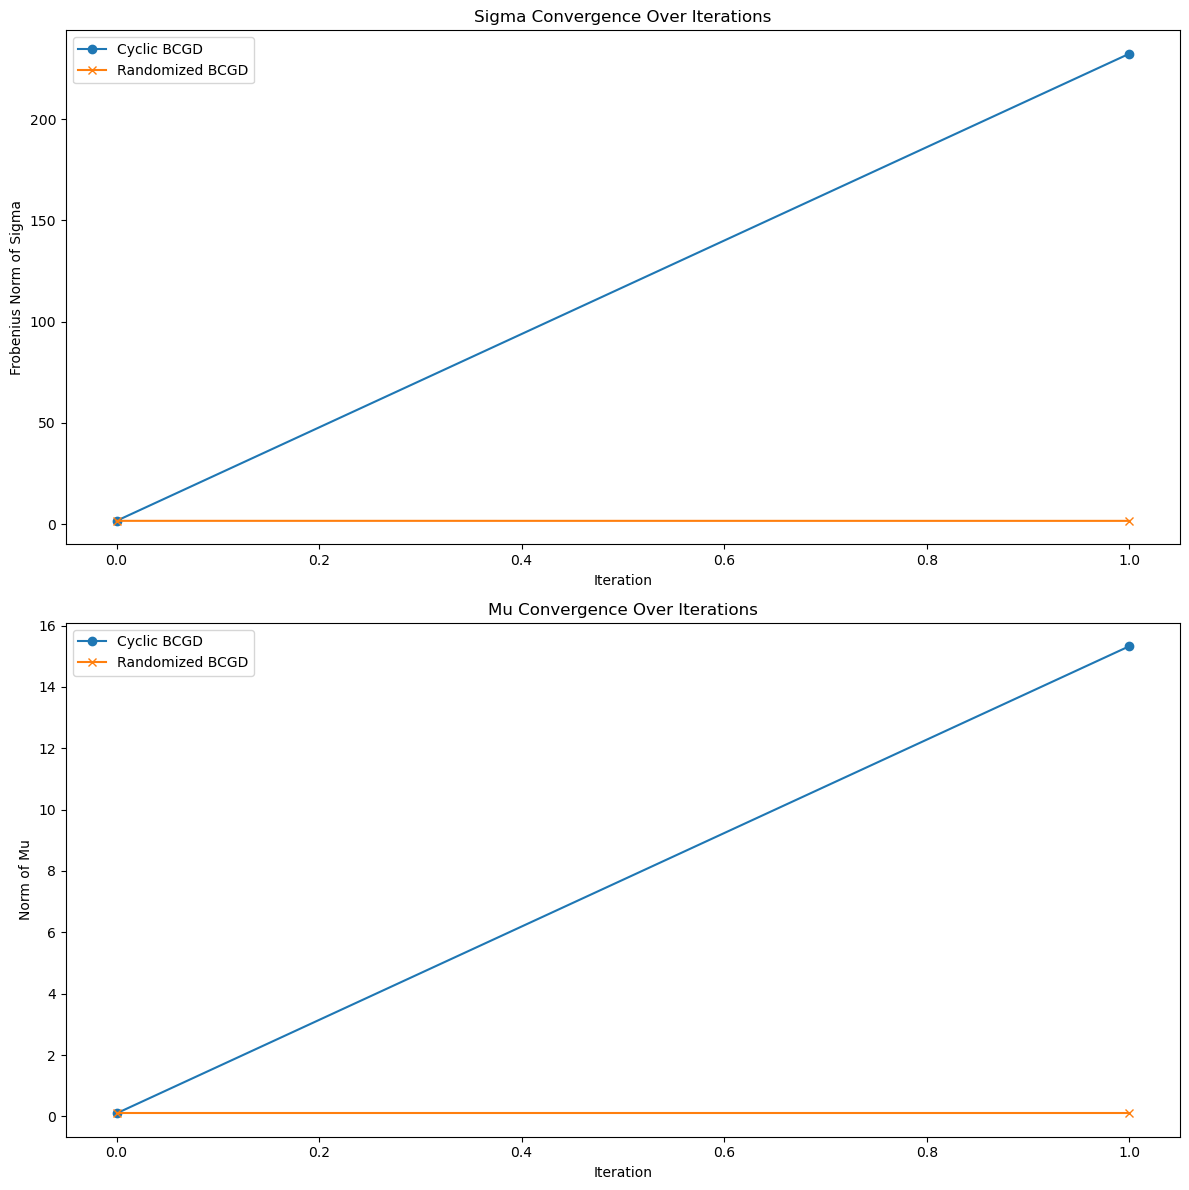

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def update_mu(X, Sigma):
    """ Update mu given fixed Sigma. """
    n = X.shape[0]
    Sigma_inv = np.linalg.inv(Sigma)
    mu_new = np.dot(np.sum(X, axis=0), Sigma_inv) / np.sum(Sigma_inv)
    return mu_new

def update_sigma(X, mu):
    """ Update Sigma given fixed mu. """
    diff = X - mu
    Sigma_new = np.sum([np.outer(d, d) for d in diff], axis=0) / len(X)
    return Sigma_new

def has_converged(mu_old, mu_new, sigma_old, sigma_new, tol=1e-4):
    """ Check if the change in parameters is below the threshold 'tol'. """
    delta_mu = np.linalg.norm(mu_new - mu_old)
    delta_sigma = np.linalg.norm(sigma_new - sigma_old, ord='fro')
    return delta_mu < tol and delta_sigma < tol

def run_bcgd(X, init_mu, init_sigma, max_iter=100, tol=1e-4, alpha=1.0, randomized=False):
    mu, Sigma = init_mu, init_sigma
    mu_values, sigma_values = [np.linalg.norm(init_mu)], [np.linalg.norm(init_sigma, 'fro')]  # Initial values

    mu_old, sigma_old = np.copy(mu), np.copy(Sigma)
    for i in range(max_iter):
        if randomized and np.random.rand() < 0.5:
            mu_new = update_mu(X, Sigma)
            mu = mu_old + alpha * (mu_new - mu_old)
            Sigma_new = np.copy(Sigma)  # Important to update Sigma_new even if Sigma isn't updated this iteration
        else:
            Sigma_new = update_sigma(X, mu)
            Sigma = sigma_old + alpha * (Sigma_new - sigma_old)
            mu_new = np.copy(mu)  # Important to update mu_new even if mu isn't updated this iteration

        if not randomized:
            mu_new = update_mu(X, Sigma)
            mu = mu_old + alpha * (mu_new - mu_old)
            Sigma_new = update_sigma(X, mu)
            Sigma = sigma_old + alpha * (Sigma_new - sigma_old)

        mu_old, sigma_old = np.copy(mu), np.copy(Sigma)
        mu_values.append(np.linalg.norm(mu))
        sigma_values.append(np.linalg.norm(Sigma, 'fro'))

        if has_converged(mu_old, mu_new, sigma_old, Sigma_new, tol):
            print(f"Converged at iteration {i+1}")
            break

    return mu_values, sigma_values

# Example usage
np.random.seed(0)
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
init_mu = np.mean(X, axis=0)
init_sigma = np.cov(X, rowvar=False)

mu_values_cyclic, sigma_values_cyclic = run_bcgd(X, init_mu, init_sigma, randomized=False)
mu_values_random, sigma_values_random = run_bcgd(X, init_mu, init_sigma, randomized=True)

# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].plot(sigma_values_cyclic, 'o-', label='Cyclic BCGD')
ax[0].plot(sigma_values_random, 'x-', label='Randomized BCGD')
ax[0].set_title('Sigma Convergence Over Iterations')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Frobenius Norm of Sigma')
ax[0].legend()

ax[1].plot(mu_values_cyclic, 'o-', label='Cyclic BCGD')
ax[1].plot(mu_values_random, 'x-', label='Randomized BCGD')
ax[1].set_title('Mu Convergence Over Iterations')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Norm of Mu')
ax[1].legend()

plt.tight_layout()
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(dim, num_samples=1000):
    """ Generate multivariate normal data with specified dimension. """
    np.random.seed(0)
    mean = np.zeros(dim)  # 100-dimensional zero vector
    # Create a random positive definite matrix for covariance
    A = np.random.rand(dim, dim)
    covariance = np.dot(A, A.transpose())  # Make sure it's positive definite
    return np.random.multivariate_normal(mean, covariance, size=num_samples), mean, covariance

def update_mu_block(X, Sigma, block_indices):
    """ Update a block of mu given fixed Sigma. """
    Sigma_inv = np.linalg.inv(Sigma)
    X_sum = np.sum(X, axis=0)
    mu_new = np.zeros_like(X_sum)
    # Only update the indices within the specified block
    mu_new[block_indices] = np.dot(Sigma_inv[block_indices, :], X_sum) / np.sum(Sigma_inv[block_indices, :], axis=1)
    return mu_new

def update_sigma_block(X, mu, block_rows, block_cols):
    """ Update a block of Sigma given fixed mu. """
    n = X.shape[0]
    diff = X - mu
    Sigma_new = np.zeros((mu.size, mu.size))
    # Only update the block in Sigma specified by block_rows and block_cols
    for i in block_rows:
        for j in block_cols:
            Sigma_new[i, j] = np.sum(diff[:, i] * diff[:, j]) / n
    return Sigma_new

def run_bcgd(X, init_mu, init_sigma, mu_blocks, sigma_blocks, max_iter=100):
    """ Run Block Coordinate Gradient Descent on blocks defined for mu and Sigma. """
    mu, Sigma = init_mu, init_sigma
    for _ in range(max_iter):
        # Update each block of mu
        for block in mu_blocks:
            mu[block] = update_mu_block(X, Sigma, block)
        # Update each block of Sigma
        for block_rows, block_cols in sigma_blocks:
            Sigma[np.ix_(block_rows, block_cols)] = update_sigma_block(X, mu, block_rows, block_cols)

    return mu, Sigma

# Example usage
dim = 100
X, true_mu, true_sigma = generate_data(dim)
init_mu = np.mean(X, axis=0)
init_sigma = np.cov(X, rowvar=False)

# Define blocks, e.g., split into 10 blocks of 10 dimensions each for mu
mu_blocks = [list(range(i, i + 10)) for i in range(0, dim, 10)]
# For Sigma, we can also consider block updates (10x10 blocks)
sigma_blocks = [(list(range(i, i + 10)), list(range(j, j + 10))) for i in range(0, dim, 10) for j in range(i, dim, 10)]

mu_est, sigma_est = run_bcgd(X, init_mu, init_sigma, mu_blocks, sigma_blocks)


ValueError: shape mismatch: value array of shape (100,) could not be broadcast to indexing result of shape (10,)

In [3]:
import numpy as np
from itertools import chain

# Define the update functions for mu and Sigma blocks
def update_mu_block(X, Sigma, block_indices):
    """ Update a block of mu given fixed Sigma. """
    n = X.shape[0]
    Sigma_inv_block = np.linalg.inv(Sigma)[np.ix_(block_indices, block_indices)]
    mu_new_block = Sigma_inv_block @ np.sum(X[:, block_indices], axis=0).T
    mu_new_block /= np.sum(Sigma_inv_block, axis=1)
    return mu_new_block

def update_sigma_block(X, mu, block_indices):
    """ Update a block of Sigma given fixed mu. """
    n = X.shape[0]
    diff = X - mu
    Sigma_new_block = np.zeros((len(block_indices), len(block_indices)))
    for idx_i, i in enumerate(block_indices):
        for idx_j, j in enumerate(block_indices):
            Sigma_new_block[idx_i, idx_j] = np.mean(diff[:, i] * diff[:, j])
    return Sigma_new_block

def has_converged(mu_old, mu_new, sigma_old, sigma_new, tol=1e-4):
    """ Check if the change in parameters is below the threshold 'tol'. """
    delta_mu = np.linalg.norm(mu_new - mu_old)
    delta_sigma = np.linalg.norm(sigma_new - sigma_old, ord='fro')
    return delta_mu < tol and delta_sigma < tol

# Define the BCGD algorithm
def block_coordinate_descent(X, init_mu, init_sigma, blocks, max_iter=100, tol=1e-4):
    """ Block Coordinate Descent algorithm for high-dimensional optimization """
    mu = init_mu.copy()
    Sigma = init_sigma.copy()
    n_blocks = len(blocks)

    for iteration in range(max_iter):
        mu_prev = mu.copy()
        Sigma_prev = Sigma.copy()
        
        # Update mu block-wise
        for block in blocks:
            mu_block = update_mu_block(X, Sigma, block)
            mu[block] = mu_block

        # Update Sigma block-wise
        for i in range(n_blocks):
            block_i = blocks[i]
            Sigma_block = update_sigma_block(X, mu, block_i)
            Sigma[np.ix_(block_i, block_i)] = Sigma_block

            # Update off-diagonal blocks
            for j in range(i+1, n_blocks):
                block_j = blocks[j]
                # Combine the indices from block_i and block_j for the update
                combined_blocks = list(chain(block_i, block_j))
                Sigma_ij = update_sigma_block(X, mu, combined_blocks)
                # Assign the update to the appropriate off-diagonal block in Sigma
                row_indices = list(block_i) + [None] * len(block_j)  # Extend block_i with placeholders
                col_indices = [None] * len(block_i) + list(block_j)  # Extend block_j with placeholders
                Sigma[np.ix_(block_i, block_j)] = Sigma_ij[:len(block_i), len(block_i):]
                Sigma[np.ix_(block_j, block_i)] = Sigma_ij[len(block_i):, :len(block_i)]

        # Check convergence (assuming has_converged function is defined correctly)
        if has_converged(mu_prev, mu, Sigma_prev, Sigma, tol):
            print(f"Converged at iteration {iteration+1}")
            break

    return mu, Sigma


# Define the RBCD algorithm
def randomized_block_coordinate_descent(X, init_mu, init_sigma, mu_blocks, sigma_blocks, max_iter=100, tol=1e-4):
    mu = init_mu.copy()
    Sigma = init_sigma.copy()

    for iteration in range(max_iter):
        mu_prev = mu.copy()
        Sigma_prev = Sigma.copy()

        # Randomly select a block to update
        block_choice = np.random.choice(['mu', 'sigma'])
        
        if block_choice == 'mu':
            # Randomly select a mu block to update
            mu_block_index = np.random.randint(len(mu_blocks))
            mu_block = mu_blocks[mu_block_index]
            mu[mu_block] = update_mu_block(X, Sigma, mu_block)
            
        else:
            # Randomly select a Sigma block to update
            sigma_block_index = np.random.randint(len(sigma_blocks))
            sigma_block = sigma_blocks[sigma_block_index]
            
            # Update diagonal block
            Sigma[np.ix_(sigma_block, sigma_block)] = update_sigma_block(X, mu, sigma_block)

            # Update corresponding symmetric off-diagonal block
            for j in range(sigma_block_index + 1, len(sigma_blocks)):
                block_j = sigma_blocks[j]
                combined_blocks = list(chain(sigma_block, block_j))
                Sigma_ij = update_sigma_block(X, mu, combined_blocks)
                Sigma[np.ix_(sigma_block, block_j)] = Sigma_ij[:len(sigma_block), len(sigma_block):]
                Sigma[np.ix_(block_j, sigma_block)] = Sigma_ij[len(sigma_block):, :len(sigma_block)]

        # Check convergence
        if np.linalg.norm(mu - mu_prev) < tol and np.linalg.norm(Sigma - Sigma_prev, ord='fro') < tol:
            print(f"Converged at iteration {iteration+1}")
            break

    return mu, Sigma

# Example usage for high-dimensional data
n_features = 300  # Number of features
n_samples = 1000  # Number of samples
block_size = 10   # Size of each block

# Generate high-dimensional synthetic data
np.random.seed(42)
X = np.random.randn(n_samples, n_features)
init_mu = np.zeros(n_features)
init_sigma = np.eye(n_features)

# Define blocks for mu and Sigma
blocks = [range(i, i + block_size) for i in range(0, n_features, block_size)]

# Run the Block Coordinate Descent algorithm
mu_est, sigma_est = block_coordinate_descent(X, init_mu, init_sigma, blocks)

# Print the final estimates
# print("Estimated mu:", mu_est)
# print("Estimated Sigma:\n", sigma_est)


# Define blocks, e.g., split into 10 blocks of 10 dimensions each for mu
mu_blocks = [list(range(i, i + 10)) for i in range(0, n_features, 10)]
# For Sigma, we can also consider block updates (10x10 blocks)
sigma_blocks = [list(range(i, i + 10)) for i in range(0, n_features, 10)]

# Run the Randomized Block Coordinate Descent
mu_est, sigma_est = randomized_block_coordinate_descent(X, init_mu, init_sigma, mu_blocks, sigma_blocks)


Converged at iteration 13
Converged at iteration 4
